# Data Visualization
Source: https://www.kaggle.com/benhamner/python-data-visualizations/notebook

Pandas lets us work with dataframes and vectors, warnings lets us ignore seaborn warnings (there are many by default), seaborn is a python graphing library and so is matplotlib.

In [9]:
%matplotlib inline

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

We will be using the classic Iris data set, which is loaded below.

In [4]:
iris = pd.read_csv("Iris Data/Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let's explore the species variables.

In [6]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

The data set is equally split into 50 cases of each species, giving a total sample of 150.
## Univariate Analysis
The first graph we will create is a **SCATTERPLOT** using the pandas dataframe '.plot' extension. We will look at the distribution of sepal length x sepal width.

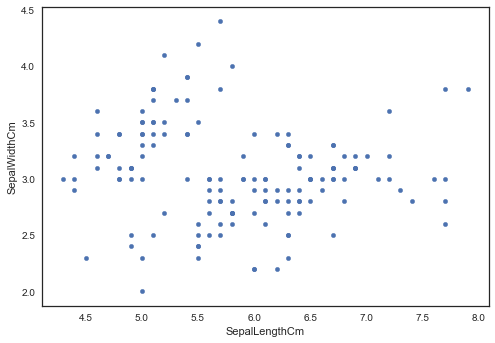

In [10]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

At first glance it looks like a fairly scattered distribution, it doesn't appear that there are any clear patterns such as the longer the sepal length, the larger the width.

We can also use a seaborn **JOINTPLOT** to do the same thing, except also display histograms along the x and y axes.

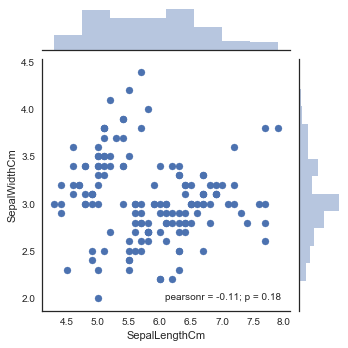

In [11]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

This graph is useful, but it can be improved by highlighting the distribution of the different species. This can be achieved using seaborn's **FACETGRID**.

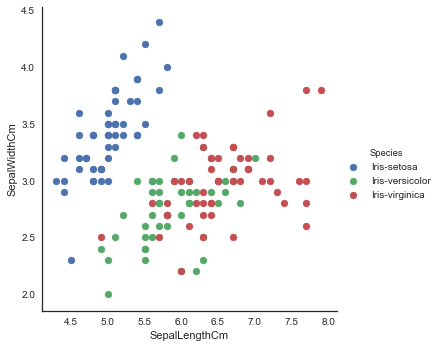

In [12]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

This is much better, you can clearly see patterns in the distribution of the different species with Iris-setosa generally having shorter, wider sepals whilst Iris-virginica tends to have longer, medium width sepals.

The scatter graph has been useful but a **BOXPLOT** can expose the individual distributions of each species separately. This time we will look at the petal length of each species.

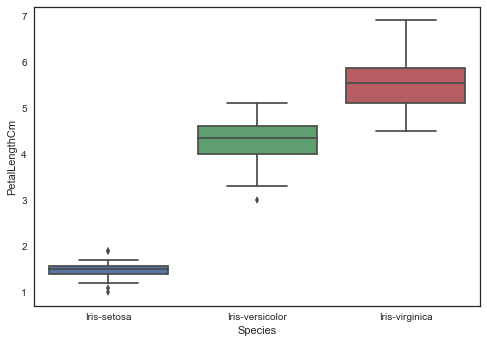

In [13]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

We can see here that the pattern in petal length is similar to that of sepal length/width with virginica being the largest and setosa the smallest. Boxplots display the 4 quartiles (separated by lines) with the median in the middle and the largest and smallest values marked at the end of the box. The dots outside of the max and min values are classed as outliers.

This graph can be enhanced by displaying the individual points on top of the box plot in a **STRIPPLOT**. We create an 'ax' object so that we can plot both graphs on top of each other, we also set 'jitter' to 'True' to ensure the points aren't displayed in a straight line.

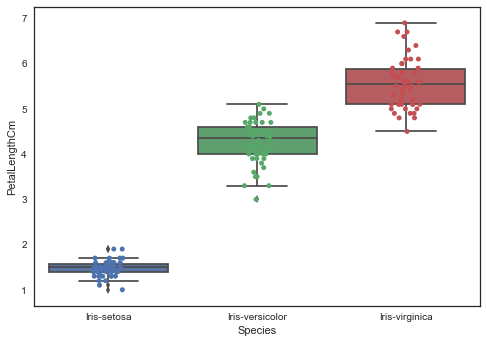

In [15]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

Alternatively, we could use a **VIOLINPLOT** which broadly does the same as above, becoming thicker in the regions where more data is concentrated.

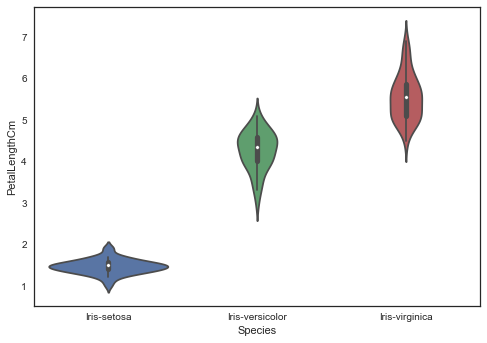

In [16]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

One final seaborn plot useful for univariate analysis is the **kdeplot** (kernel density estimate) which is essentially a histogram which smooths the transitions between values using a kernel method.

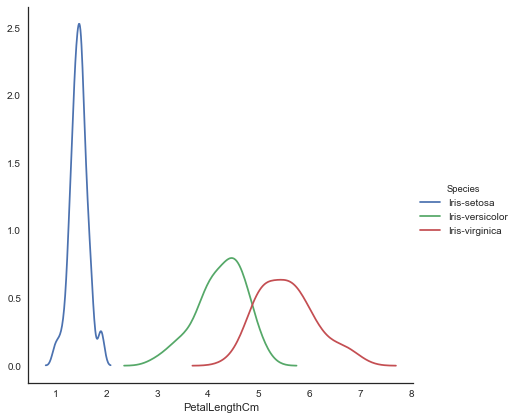

In [17]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

# To Do:
* Continue from beginning of multivariate analysis (pairplots).